# NLP Sentiment Analysis Introduction

#### The purpose of this assignment is to compute the sentiment of text information - in our case, tweets posted in 2019 Canadian elections - and answer the research question: “What can public opinion on Twitter tell us about the Canadian political landscape in 2019?” The goal is to essentially use sentiment analysis on Twitter data to get insight into the 2019 Canadian elections.

**Learning Objective:**


1. Implement functionality to parse and clean data according to given requirements. 2.Understand how exploring the data by creating visualizations leads to a deeper understanding of the data.
3. Learn about training and testing machine learning algorithms (logistic regression, k-NN, decision trees, random forest, XGBoost).
4. Understand how to apply machine learning algorithms to the task of text classification. 5. 5. Improve on skills and competencies required to collate and present domain specific, evidence-based insights.

In [3]:
#pip install -U gensim

In [4]:
#pip install wordcloud

In [3]:
import html
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
import pandas as pd
import numpy as np


import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charliewu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Cleaning

The tweets, as given, are not in a form amenable to analysis -- there is too much ‘noise’. Therefore, the first step is to “clean” the data. Design a procedure that prepares the Twitter data for analysis by satisfying the requirements below.
- All html tags and attributes (i.e., /<[^>]+>/) are removed.
- Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
- All URLs are removed.
- All characters in the text are in lowercase.
- All stop words are removed. Be clear in what you consider as a stop word. 
- If a tweet is empty after pre-processing, it should be preserved as such.

In [4]:
Election_df = pd.read_csv('Canadian_elections_2019.csv')
Sentiment_tweets = pd.read_csv('Sentiment.csv')

In [5]:
Sentiment_tweets.head(50)

,sentiment,text
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ..."
2,Positive,I'm listening The Beatles now. They're great
3,Positive,@ddlovato could i please get a shout out or an...
4,Positive,@salspizza just spotted ur message there Tony ...
5,Negative,"finished watching Lost 514.... oh Faraday, pit..."
6,Positive,Hoping for a nice day today!
7,Positive,"@inque54 huy, matulog ka na. hahah. CBroom ain..."
8,Positive,@GiggyPig you're not the only one who likes de...
9,Negative,is at work waiting for shortlisting results a...


In [6]:
Election_df.head(10)

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."
5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ..."
6,Positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h..."
7,Positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d..."
8,Negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don..."
9,Negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh..."


In [7]:
'''
This function combines various data cleaning strategies as reqruied in the assignment. 
Bascially, the function will first take the csv file name to be cleaned and then start cleaning the data.

'''

def cleaning(file_input):
    # Load the origrinal dataset
    file_cleaned = pd.read_csv(file_input)
    
    # Remove all html tags and attributes(i.e., /<[^>]+>/)
    file_cleaned['text'] = file_cleaned['text'].map(lambda x: re.sub(r'<[^>]+>','',str(x)))
    
    #Remove URL
    file_cleaned['text'] = file_cleaned['text'].map(lambda x: re.sub(r'http\S+','',str(x)))
    
    # Replace Html character codes (i.e., &...;) with an ASCII equivalent.
    file_cleaned['text'] = file_cleaned['text'].map(lambda x: html.unescape(x))
    
    # Lowering the characters
    file_cleaned['text'] = file_cleaned['text'].map(lambda x: x.lower())
    
    # Remove all stop words imported from NLTK
    tokenizer = RegexpTokenizer(r'\w+')
    file_cleaned['text'] = file_cleaned['text'].apply(lambda x: tokenizer.tokenize(x))
    file_cleaned['text'] = file_cleaned['text'].apply(lambda x: [item for item in x if item not in stopwords.words('english')])
    file_cleaned['text'] = file_cleaned['text'].apply(lambda x:' '.join(x))
    return file_cleaned
    

In [8]:
# Data Cleaning - 'Canadian_elections_2019.csv'
data_cleaned_election = cleaning('Canadian_elections_2019.csv')

In [9]:
# Print the frist 10 rows
data_cleaned_election.head(10)

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,b rosiebarton instead suggestion agree canadia...
1,Positive,NaN,b allwomanspacewalk real n space_station n eto...
2,Negative,Economy,b brantford going cost 94 billion next 4 years...
3,Positive,NaN,b canada canadaelection2019 canadavotes n elxn...
4,Negative,Economy,b canada taxpayers sick tired hard earned dona...
5,Negative,Others,b canadavotes2019 elxn43 cdnpoli facts blastfr...
6,Positive,NaN,b cdnmedia elxn43 cdnpoli ppc rocky dong hands...
7,Positive,NaN,b cdnpoli elxn43 liberals double promised 2015...
8,Negative,Others,b chooseforward cdnpoli elxn43 ncanada make am...
9,Negative,Scandal,b cpckinsellagate nlet see receipts pays warre...


In [10]:
# Data Cleaning - 'Sentiment.csv'
data_cleaned_sentiment = cleaning('Sentiment.csv')

In [11]:
data_cleaned_sentiment.head(10)

,sentiment,text
0,Positive,rt diplomtc_immnty realdonaldtrump tried take ...
1,Negative,chiefy74 damn jealous wanna watch fight love u...
2,Positive,listening beatles great
3,Positive,ddlovato could please get shout anything huge ...
4,Positive,salspizza spotted ur message tony replied
5,Negative,finished watching lost 514 oh faraday pity elo...
6,Positive,hoping nice day today
7,Positive,inque54 huy matulog ka na hahah cbroom done ye...
8,Positive,giggypig one likes deepness
9,Negative,work waiting shortlisting results kicking back...


# 2. Exploratory Analysis

## Part a): Determine political party

**First, the words followed after # and @ are extracted from the dataset. Second, Counter is used to count the number of occurrences for each mentioned (@) and hash-taged term. This is because, these terms and words can help us to identify the party that each tweet belongs to.**

In [13]:
# Most common hastag
Tweets_all = Election_df["text"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in Tweets_all.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [14]:
hashTagsCounter.most_common(10)

[('#elxn43', 1720),
 ('#cdnpoli', 895),
 ('#chooseforward', 123),
 ('#cpc', 71),
 ('#trudeaumustgo', 62),
 ('#elxn2019', 60),
 ('#kinsellagate', 51),
 ('#cdnelxn2019', 48),
 ('#canada', 47),
 ('#uprisingh', 42)]

In [15]:
# Most common mentions
Tweets_all = Election_df["text"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in Tweets_all.split()]
mentions = [word for word in tweetWords if word.startswith("@")]
mentionsCounter = Counter(mentions)

In [16]:
mentionsCounter.most_common(10)

[('@andrewscheer', 136),
 ('@justintrudeau', 103),
 ('@cpc_hq', 82),
 ('@thejagmeetsingh', 47),
 ('@liberal_party', 44),
 ('@ndp', 34),
 ('@maximebernier', 34),
 ('@cbckatie', 32),
 ('@vankayak', 26),
 ('@canadiangreens', 25)]

In [18]:
# Combine both types of words into relevant words
Relevant_Words = hashTags + mentions

In [19]:
# remove any @ and # in the text
Relevant_Words=[re.sub(r'[^A-Za-z0-9]+', '', x) for x in Relevant_Words]

**Based on the above results and online research, we could summarize the dictionaires for the three parties:**

In [21]:
# The following function takes the 
def define_party (Each_tweet):
    
    Liberal = ['justin','justintrudeau','liberal_party','liberal','liberals','teamtrudeau','trudeaumustgo','trudeau','lpc']
    Conservative = ['conservatives','andrewscheer','cpc_hq','cpc','conservative','lyingandy']
    ndp = ['ndp','thejagmeetsingh','uprisingh','quebec','uprisingh','emilietaman']
    # Initialize the count for each party
    result = []
    Most_Common_Party = []
    
    #The for loop would help to filter and store the part name to each each tweet
    for word in Each_tweet.split():
        if word in Liberal:
            result.append('liberal')
        if word in Conservative:
            result.append('Conservative')
        if word in ndp:
            result.append('ndp')

    # Check the most common part names for each tweet
    if len(result) >= 1:
        Party_name = max(set(result),key = result.count)
        Most_Common_Party.append(Party_name)
    elif len(result) == 0:
        Most_Common_Party.append('None')
    
    return Most_Common_Party

In [22]:
# Calculate the number of parties for the cleaned dataset - 'Canadian_elections_2019.csv'
Party_list_election= []
party_counter = Counter()
for tweet in data_cleaned_election['text']:
    Party_list_election.append(define_party(tweet)[0])
party_counter.update(Party_list_election)


In [23]:
# Check the # of tweets to each party
party_counter

Counter({'Conservative': 382, 'None': 1140, 'liberal': 460, 'ndp': 151})

In [24]:
# Add the party to the dataset
data_cleaned_election['Party'] = Party_list_election

In [25]:
data_cleaned_election.head()

,sentiment,negative_reason,text,Party
0,Negative,Women Reproductive right and Racism,b rosiebarton instead suggestion agree canadia...,Conservative
1,Positive,NaN,b allwomanspacewalk real n space_station n eto...,None
2,Negative,Economy,b brantford going cost 94 billion next 4 years...,liberal
3,Positive,NaN,b canada canadaelection2019 canadavotes n elxn...,None
4,Negative,Economy,b canada taxpayers sick tired hard earned dona...,liberal


## Part b): Data Visulization

Text(0.5, 1.0, 'Distribution of polical affiliations of tweets (2019 Election Tweets)')

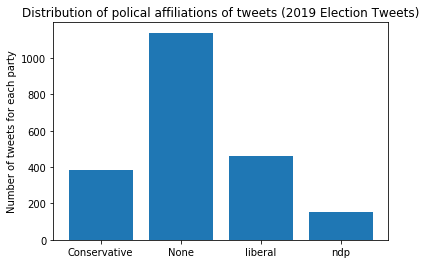

In [26]:
# plot histogram to visualize the distribution - 'Canadian_elections_2019.csv'
Party_name = party_counter.keys()
Party_count = party_counter.values()
Range = range(len(Party_name))

plt.bar(Range,Party_count)
plt.xticks(Range,Party_name)
plt.ylabel('Number of tweets for each party')
plt.title('Distribution of polical affiliations of tweets (2019 Election Tweets)')

As shown above, it is noted that the majority of the tweets belongs to "None' political party as these tweets have little infromation to be related to any of the three parties. For example, the tweets in the "none" could be from some small parties, such as Green party and New Democratic Party.

In [27]:
# Calculate the number of parties for the cleaned dataset  - 'Sentiment.csv'
Party_list_senti = []
party_counter = Counter()
for tweet in data_cleaned_sentiment['text']:
    Party_list_senti.append(define_party(tweet)[0])
party_counter.update(Party_list_senti)


Text(0.5, 1.0, 'Distribution of polical affiliations of tweets (Sentiment)')

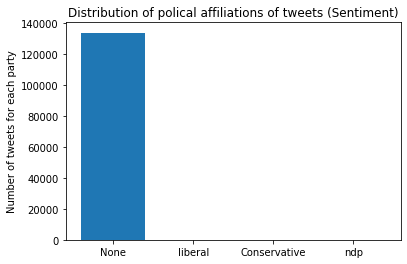

In [28]:
# plot histogram to visualize the distribution - 'Sentiment.csv'
Party_name = party_counter.keys()
Party_count = party_counter.values()
Range = range(len(Party_name))

plt.bar(Range,Party_count)
plt.xticks(Range,Party_name)
plt.ylabel('Number of tweets for each party')
plt.title('Distribution of polical affiliations of tweets (Sentiment)')

As shown above, it seems that the generics from Sentiment file is skewed to the left, which is less meaningful than the previous (unclassified histgram plot). 

### Bous: WordCloud to display the results of the model visually

### Election text file

In [354]:
# Extract and organize words to prepare for the Wordcloud display
Election_wordlist2 = data_cleaned_election['text'].str.cat(sep=" ").split(" ") 
ElectionCounter = Counter(Election_wordlist2)
words_election = []
for word, count in ElectionCounter.most_common(300):
    words_election.append(word)
    

In [355]:
# Join with words with " "
words_election =" ".join(words_election)

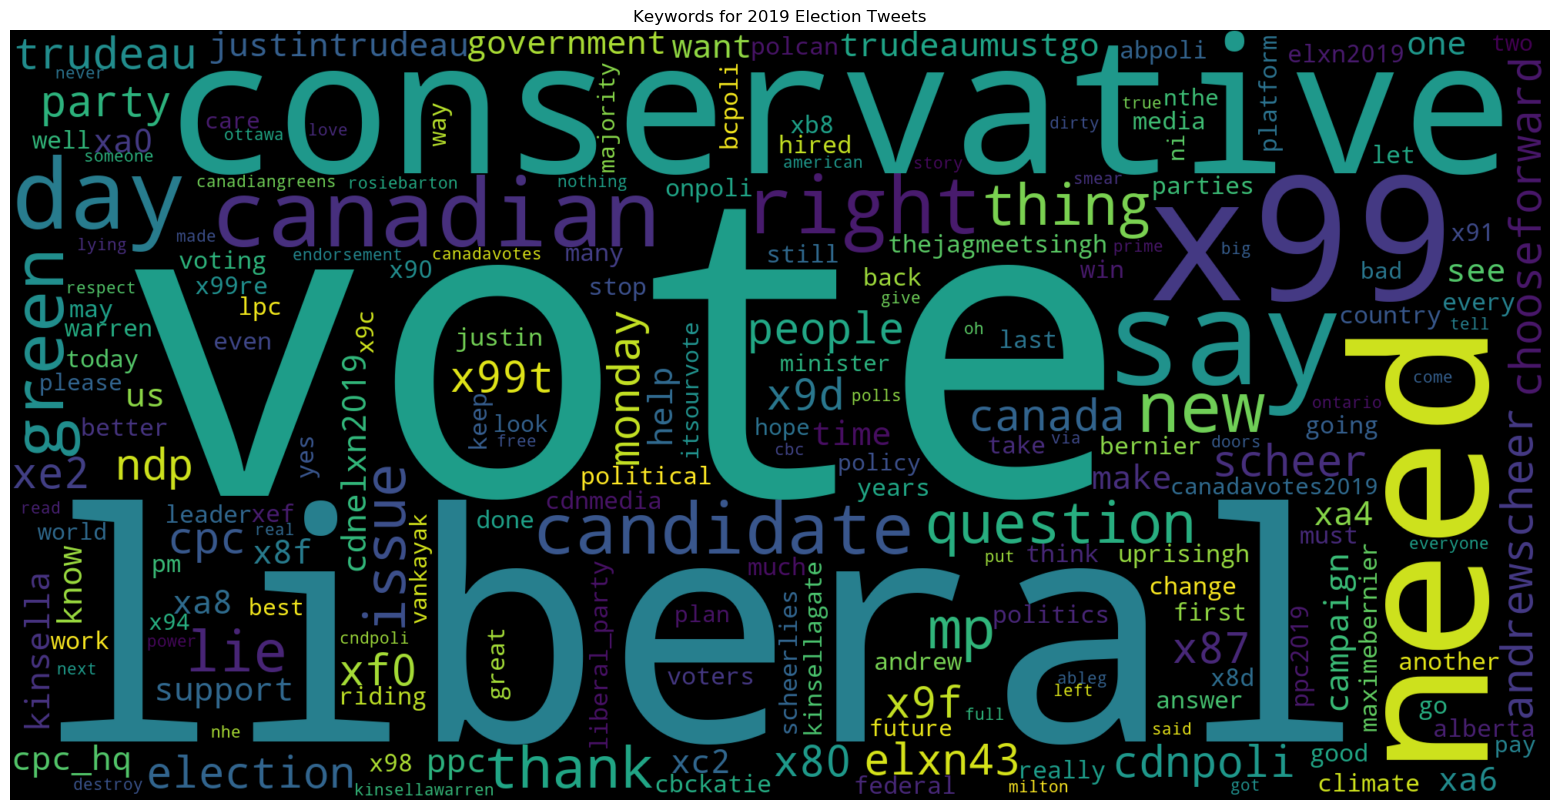

In [356]:
# Visualize the keywords for Election file
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_election)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords for 2019 Election Tweets')
plt.axis("off")
plt.show()

When selecting top 300 most common words, it is noted that the liberal stand out, meaning many people in election file mentioned liberal parties.

### Sentiment text file

In [375]:
# Extract and organize words to prepare for the Wordcloud display
Sentiment_wordlist = data_cleaned_sentiment['text'].str.cat(sep=" ").split(" ") 
SentimentCounter = Counter(Sentiment_wordlist)
#Sentiment_wordlist = " ".join(Sentiment_wordlist)
words_sen = []
for word, count in SentimentCounter.most_common(1000):
    words_sen.append(word)
    

In [376]:
# Join with words with " "
words_sen =" ".join(words_sen)

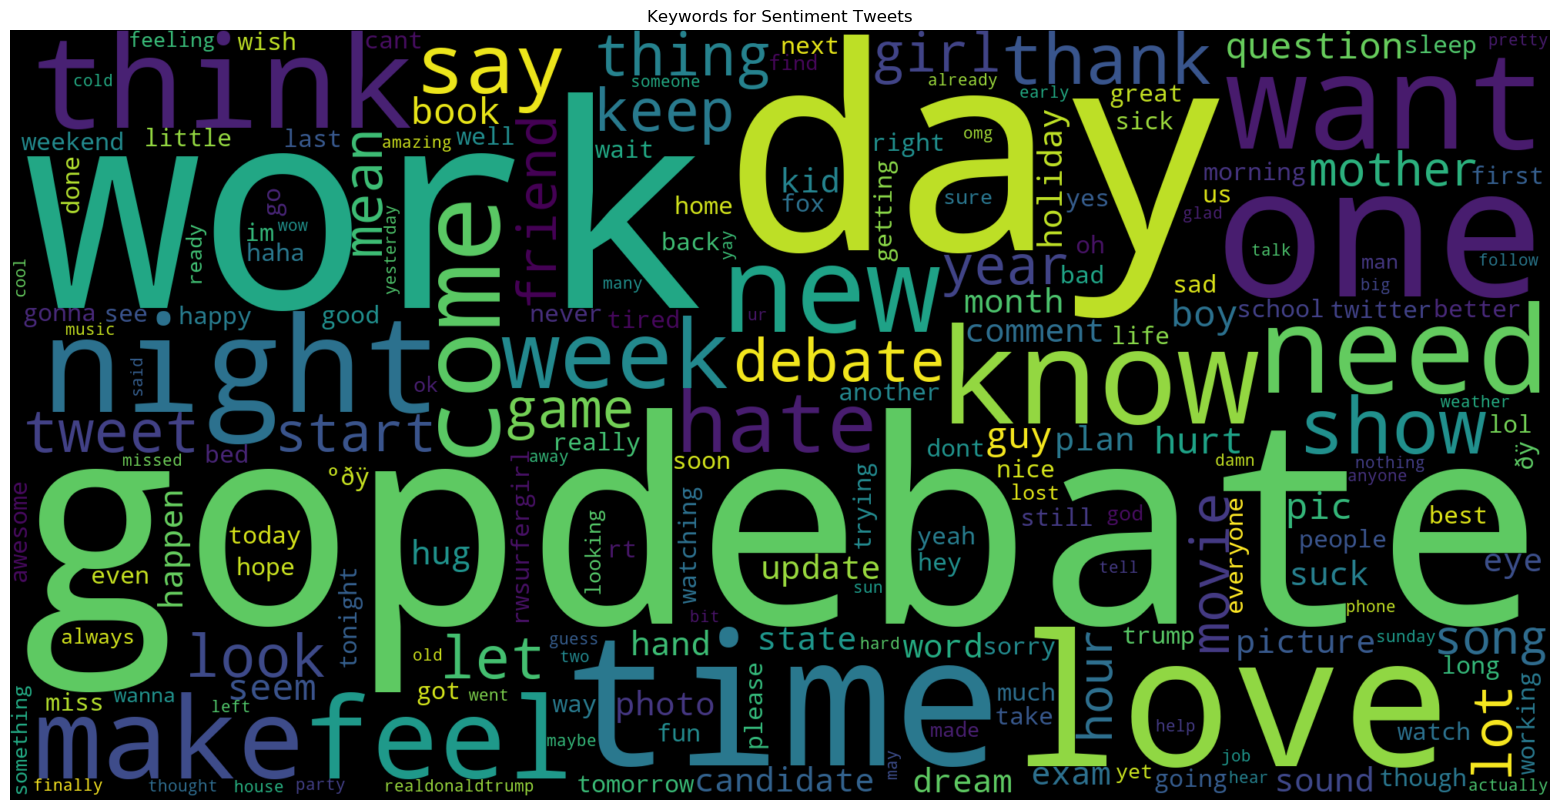

In [377]:
# Visualize the keywords for sentiment file
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_sen)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords for Sentiment Tweets')
plt.axis("off")
plt.show()

The WordCloud plot shows that most common words in sentiment tweets, which are not very relevant to the key words stated in each party. 
This is the reason why  most of tweets are classified as None type.


# 3. Model Preparation

The targets are currently a string representing postive, negative and netrual. Thus, we may need filter out the netural sentiment and convert the "Positive" to 1 and "negative" to 0.

In [33]:
# Check for the unique targets
data_cleaned_sentiment.sentiment.unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [34]:
# Filter out number of sentiments which are neutral
Sentiment_filtered = data_cleaned_sentiment[(data_cleaned_sentiment["sentiment"]== 'Positive') | 
                      (data_cleaned_sentiment["sentiment"]== 'Negative')]

In [35]:
Sentiment_filtered.sentiment.unique()

array(['Positive', 'Negative'], dtype=object)

In [36]:
# Encode the target
Sentiment_filtered["sentiment"] = Sentiment_filtered["sentiment"].apply(lambda x:1 if x=="Positive" else 0)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
Sentiment_filtered

,sentiment,text
0,1,rt diplomtc_immnty realdonaldtrump tried take ...
1,0,chiefy74 damn jealous wanna watch fight love u...
2,1,listening beatles great
3,1,ddlovato could please get shout anything huge ...
4,1,salspizza spotted ur message tony replied
...,...,...
133806,1,scottw nice 20 20 honest think really need 20 ...
133807,1,â œ bw_react gopdebate verdict johnkasich wins...
133808,0,amtrack sorry love tho thats matters hahahaha
133809,1,razortv champions league 25 free bet


In [38]:
# Split the data into trian and test groups
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(Sentiment_filtered['text'], Sentiment_filtered['sentiment'], test_size=0.3)


In [39]:
X_sentiment_train

53834     ok official day great day might well say tomor...
101628                                            going bed
120488      rosemary dad planted wee little one grown enjoy
71600                       st john discover new york class
3417                          checking dogs anal galds full
                                ...                        
50988     gopdebate candidates honestly terrify one actu...
118567    rt kimguilfoyle two great debates favorites le...
85199                                            vomit urgh
73516     woohoo darn hot philippines one effects global...
63253                             az_alkmaar commnts needed
Name: text, Length: 91468, dtype: object

## Word/term Frequency

In [40]:
def WF_processor (df,num):
    vectorizer = CountVectorizer(max_features= num)
    X_sentiment_WF = vectorizer.fit_transform(df).toarray()
    Sentiment_feature_name = vectorizer.get_feature_names()
    X_sentiment_WF_df = pd.DataFrame(X_sentiment_WF, columns=Sentiment_feature_name)
    return X_sentiment_WF_df

In [41]:
X_sentiment_WF_train = WF_processor(X_sentiment_train,200)
X_sentiment_WF_test = WF_processor(X_sentiment_test,200)

In [42]:
X_sentiment_WF_train.head(30)

,actually,already,also,always,amazing,another,anyone,away,awesome,back,...,would,wow,yay,yeah,year,yes,yesterday,yet,ºðÿ,ðÿ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## TF-IDF

For this section, the TfidfVector vectorizes the tweets and calcuate the tfidf scores. The maximu features are set as 200.

In [43]:
# Calcuate the TF-IDF with TfidVectorizer - from NLP_example_assignment2
def TFIDF_processor (df,num):
    
    vectorizer = TfidfVectorizer(max_features=num)
    X_sentiment_TFIDF = vectorizer.fit_transform(df).toarray()
    Sentiment_feature_name = vectorizer.get_feature_names()
    X_sentiment_TFIDF_df = pd.DataFrame(X_sentiment_TFIDF, columns=Sentiment_feature_name)
    
    return X_sentiment_TFIDF_df

In [44]:
X_sentiment_tfidf_train  = TFIDF_processor(X_sentiment_train,200)
X_sentiment_tfidf_test = TFIDF_processor(X_sentiment_test,200)

In [45]:
X_sentiment_tfidf_train.head(30)

,actually,already,also,always,amazing,another,anyone,away,awesome,back,...,would,wow,yay,yeah,year,yes,yesterday,yet,ºðÿ,ðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.334899,0.331409


# 4. Model Implementation

## Q4 Part 1:  Model Implementation

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, datasets

### Model 1 - Logistic Regression

In [48]:
def logistic (X_train,y_train,X_test,y_test):
    Logistic = LogisticRegression()
    Pen = ['l1', 'l2']# Build a regularization penalty space list 
    C_values = np.logspace(-4, 4, 10) # build and store C hyperparameters in log space list
    hyperparameters = dict(C = C_values, penalty = Pen) # Create hyperparameter options
    clf = GridSearchCV(Logistic, hyperparameters, cv = 5, verbose=0, scoring = 'accuracy')# build a grid search using 5-fold cross validation with the metric of accuracy
    Log_model = clf.fit(X_train, y_train) # Fit grid search
    
    # Optimized hyperparameters
    Best_Penalty = Log_model.best_estimator_.get_params()['penalty']
    Best_C = Log_model.best_estimator_.get_params()['C']
    
    # Predict the values
    y_pred_train = Log_model.predict(X_train).reshape(y_train.shape[0],1)
    y_pred_test = Log_model.predict(X_test).reshape(y_test.shape[0],1)
    
    Train_accuracy =  accuracy_score(np.array(y_train),y_pred_train)
    Test_accuracy = accuracy_score(np.array(y_test),y_pred_test)
    return Best_Penalty,Best_C,Train_accuracy,Test_accuracy


In [1]:
# Compute the accuracy for wf for both training and testing dataset
Best_Penalty,Best_C,Train_accuracy_wf,Test_accuracy_wf= logistic(X_sentiment_WF_train,y_sentiment_train,X_sentiment_WF_test,y_sentiment_test)

# Compute the accuracy for tfidf for both training and testing dataset
Best_Penalty,Best_C,Train_accuracy_tfidf,Test_accuracy_tfidf= logistic(X_sentiment_tfidf_train,y_sentiment_train,X_sentiment_tfidf_test,y_sentiment_test)


In [50]:
print('Best Penalty:',Best_Penalty)
print('Best C: %0.2f' % Best_C)
print('Train Accuracy Score_wf : %0.5f' % Train_accuracy_wf)
print('Test Accuracy Score_wf : %0.5f' % Test_accuracy_wf)

print('Train Accuracy Score_tfidf : %0.5f' % Train_accuracy_tfidf)
print('Test Accuracy Score_tfidf : %0.5f' % Test_accuracy_tfidf)


Best Penalty: l1
Best C: 0.36
Train Accuracy Score_wf : 0.68163
Test Accuracy Score_wf : 0.54182
Train Accuracy Score_tfidf : 0.68256
Test Accuracy Score_tfidf : 0.54555


**Comments for Logistic:** From the above resutls, the accuracy socre for tfidf encoded data seems to have a relatively higher score than the WF encoded data. 

### Model 2 - Random Forest

For random forest tree, there generally two ways to fine-tune the random forest which are grid search and randomized search. In our case (dataset is huge), the grid search approach could be too costly, because many combinations are tested. Thus, it is easier to use a randomized search, that evaluates a only an user defied number of random combinations for each hyperparmeter at every iteration. This could also allow us to test more hyperparameters.

Reference: https://www.kaggle.com/emanueleamcappella/random-forest-hyperparameters-tuning

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [52]:
# Define number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split}

# Create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
Log_rf = rf_random.fit(X_sentiment_WF_train, y_sentiment_train)


/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [53]:
# Obtain the obtimized hyper-parameter
Best_n_estimators = Log_rf.best_estimator_.get_params()['n_estimators']
Best_max_features = Log_rf.best_estimator_.get_params()['max_features']
Best_max_depth = Log_rf.best_estimator_.get_params()['max_depth']
Best_min_samples_split = Log_rf.best_estimator_.get_params()['min_samples_split']

print('Optimized n_estimators: ',Best_n_estimators)
print('Optimized max_features: ',Best_max_features)
print('Optimized max_depth: ',Best_max_depth)
print('Optimized min_samples_split: ',Best_min_samples_split)

Optimized n_estimators:  200
Optimized max_features:  sqrt
Optimized max_depth:  45
Optimized min_samples_split:  10


In [54]:
# Use the optimzed random forest model to train the data
classifier_rf = RandomForestClassifier(n_estimators = Best_n_estimators, 
                                    max_depth = Best_max_depth,
                                    max_features = Best_max_features,
                                    min_samples_split = Best_min_samples_split)
Best_Model_wf = classifier_rf.fit(X_sentiment_WF_train, y_sentiment_train)
Best_Model_tfidf = classifier_rf.fit(X_sentiment_tfidf_train, y_sentiment_train)

# Predict the target for training dataset
y_pred_train_wf = Best_Model_wf.predict(X_sentiment_WF_train)
y_pred_train_tfidf = Best_Model_tfidf.predict(X_sentiment_tfidf_train)

# Predict the target for test dataset
y_pred_test_wf = Best_Model_wf.predict(X_sentiment_WF_test)
y_pred_test_tfidf = Best_Model_tfidf.predict(X_sentiment_tfidf_test)

# Calcualte the accuracy for training datatset
train_scores_wf_rf = metrics.accuracy_score(y_pred_train_wf, y_sentiment_train)
train_scores_tfidf_rf = metrics.accuracy_score(y_pred_train_tfidf, y_sentiment_train)

# Calcualte the accuracy for test datatset
Test_scores_wf_rf = metrics.accuracy_score(y_pred_test_wf, y_sentiment_test)
Test_scores_tfidf_rf = metrics.accuracy_score(y_pred_test_tfidf, y_sentiment_test)

print('Train Accuracy Score_WF : %0.5f' % train_scores_wf_rf)
print('Test Accuracy Score_WF : %0.5f' % Test_scores_wf_rf)
print('Train Accuracy Score_tfidf : %0.5f' % train_scores_tfidf_rf)
print('Test Accuracy Score_tfidf : %0.5f' % Test_scores_tfidf_rf)


Train Accuracy Score_WF : 0.68296
Test Accuracy Score_WF : 0.54034
Train Accuracy Score_tfidf : 0.71123
Test Accuracy Score_tfidf : 0.55006


**Comments for Random Forest:** From the above resutls, the accuracy socre for tfidf encoded data seems to have a relatively higher score than the WF encoded data. 

### Model 3 - Naive Bayes

Navie Bayes handles both continuous and discrete data. It is highly scalable with the number of predicots and data points. It is also fast and can be used to make real-time predicitons. This section, the GaussianNB is used for prediction. As for GaussianNB(), there is no hyperparameters to tune and therefore a base model will be implemented.

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
gnb = GaussianNB()
#Predict target for training dataset
y_pred_wf_train= gnb.fit(X_sentiment_WF_train, y_sentiment_train).predict(X_sentiment_WF_train)
y_pred_tfidf_train = gnb.fit(X_sentiment_tfidf_train,y_sentiment_train).predict(X_sentiment_tfidf_train)

# Predict
y_pred_wf_test = gnb.fit(X_sentiment_WF_train, y_sentiment_train).predict(X_sentiment_WF_test)
y_pred_tfidf_test = gnb.fit(X_sentiment_tfidf_train,y_sentiment_train).predict(X_sentiment_tfidf_test)

# Calculate the accuracy for training dataset
train_scores_wf_NB = metrics.accuracy_score(y_pred_wf_train, y_sentiment_train)
train_scores_tfidf_NB = metrics.accuracy_score(y_pred_tfidf_train, y_sentiment_train)

Test_scores_wf_NB = metrics.accuracy_score(y_pred_wf_test, y_sentiment_test)
Test_scores_tfidf_NB = metrics.accuracy_score(y_pred_tfidf_test, y_sentiment_test)

# Calculate the accuracy for training dataset
print('Train Accuracy Score_WF : %0.5f' % train_scores_wf_NB)
print('Test Accuracy Score_WF : %0.5f' % Test_scores_wf_NB)
print('Train Accuracy Score_tfidf : %0.5f' % train_scores_tfidf_NB)
print('Test Accuracy Score_tfidf : %0.5f' % Test_scores_tfidf_NB)


Train Accuracy Score_WF : 0.65705
Test Accuracy Score_WF : 0.55621
Train Accuracy Score_tfidf : 0.66290
Test Accuracy Score_tfidf : 0.55090


**Comments for Navie Bayes:** From the above resutls, the accuracy socre for tfidf encoded data seems to have a relatively higher score than the WF encoded data. 

### Model 4 - Decision Trees

In [57]:
from sklearn.tree import DecisionTreeClassifier
#create a dictionary of all values we want to test
param_grid = {'criterion':['gini','entropy'],
              'max_depth':[5,10,15,20],
             'max_leaf_nodes':[10,20,30],
             'min_samples_split': [2, 3, 4]}
 # decision tree model
tree = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=3)
#use gridsearch to test all values
Model_tree_wf = tree.fit(X_sentiment_WF_train, y_sentiment_train)

In [58]:
# Obtain the obtimized hyper-parameter
Best_criterion = Model_tree_wf.best_estimator_.get_params()['criterion']
Best_max_depth_tr = Model_tree_wf.best_estimator_.get_params()['max_depth']
Best_max_leaf_nodes_tr = Model_tree_wf.best_estimator_.get_params()['max_leaf_nodes']
Best_min_samples_split_tr = Model_tree_wf.best_estimator_.get_params()['min_samples_split']

print('Optimized criterion: ',Best_criterion)
print('Optimized max_depth: ',Best_max_depth_tr)
print('Optimized max_leaf_nodes: ',Best_max_leaf_nodes_tr)
print('Optimized min_samples_split: ',Best_min_samples_split_tr)


Optimized criterion:  gini
Optimized max_depth:  20
Optimized max_leaf_nodes:  30
Optimized min_samples_split:  2


In [59]:
# Use the optimzed random forest model to train the data
classifier_tree = DecisionTreeClassifier(criterion = Best_criterion, 
                                    max_depth = Best_max_depth_tr,
                                    max_leaf_nodes = Best_max_leaf_nodes_tr,
                                    min_samples_split = Best_min_samples_split_tr)
Best_Model_wf = classifier_tree.fit(X_sentiment_WF_train, y_sentiment_train)
Best_Model_tfidf = classifier_tree.fit(X_sentiment_tfidf_train, y_sentiment_train)

# Predict the target for training dataset
y_pred_train_wf = Best_Model_wf.predict(X_sentiment_WF_train)
y_pred_train_tfidf = Best_Model_tfidf.predict(X_sentiment_tfidf_train)

# Predict the target for test dataset
y_pred_test_wf = Best_Model_wf.predict(X_sentiment_WF_test)
y_pred_test_tfidf = Best_Model_tfidf.predict(X_sentiment_tfidf_test)

# Calcualte the accuracy for training datatset
train_scores_wf_tree = metrics.accuracy_score(y_pred_train_wf, y_sentiment_train)
train_scores_tfidf_tree = metrics.accuracy_score(y_pred_train_tfidf, y_sentiment_train)

# Calcualte the accuracy for test datatset
Test_scores_wf_tree = metrics.accuracy_score(y_pred_test_wf, y_sentiment_test)
Test_scores_tfidf_tree = metrics.accuracy_score(y_pred_test_tfidf, y_sentiment_test)

print('Train Accuracy Score_WF : %0.5f' % train_scores_wf_tree)
print('Test Accuracy Score_WF : %0.5f' % Test_scores_wf_tree)
print('Train Accuracy Score_tfidf : %0.5f' % train_scores_tfidf_tree)
print('Test Accuracy Score_tfidf : %0.5f' % Test_scores_tfidf_tree)


Train Accuracy Score_WF : 0.61015
Test Accuracy Score_WF : 0.54006
Train Accuracy Score_tfidf : 0.61081
Test Accuracy Score_tfidf : 0.54833


**Comments for Decision Tree:** From the above resutls, the accuracy socre for tfidf encoded data seems to have a relatively higher score than the WF encoded data. 

### Choose the best model - Visualization

In [60]:
# Obtain the test accuracy for each model
Accuracy_list = [Test_accuracy_tfidf,
                 Test_scores_tfidf_rf,
                 Test_scores_tfidf_NB,
                 Test_scores_tfidf_tree]
print(Accuracy_list)

[0.5455473074666463, 0.5500624984056529, 0.5509043136654678, 0.5483278487793679]


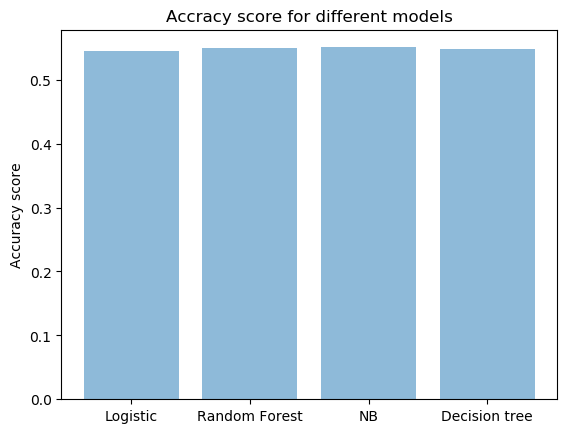

In [61]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('Logistic', 'Random Forest', 'NB', 'Decision tree')
y_pos = np.arange(len(objects))
#performance = Accuracy_list
plt.bar(y_pos, Accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy score')
plt.title('Accracy score for different models')
plt.show()

**Comments:** 
From the above bar plot, it seems that all the tree models have similar accuracy score. The random forest tends to give a better reuslts with the increasing number of samples (the sample size quit large for this assignment). Thus, the random forest is used for the next section.

### Testing on 2019 Canadian Election Tweets

In [62]:
# Encode the entire tweets in "sentiment.csv"
X_sentiment_tfidf = TFIDF_processor(Sentiment_filtered['text'],200)

In [63]:
X_sentiment_tfidf.head()

,actually,already,also,always,amazing,another,anyone,around,away,awesome,...,would,wow,yay,yeah,year,yes,yesterday,yet,ºðÿ,ðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Ecnode the entire tweets in "2019 Canadian Election.csv"
X_election_tfidf =TFIDF_processor(data_cleaned_election['text'],200)

# Encode the target - sentiment in "2019 Canadian Election"
data_cleaned_election['sentiment']= data_cleaned_election['sentiment'].apply(lambda x:1 if x=="Positive" else 0)


In [65]:
X_election_tfidf.head()

,ableg,abpoli,alberta,also,andrew,andrewscheer,another,answer,back,bad,...,xa4,xa6,xa8,xb8,xc2,xe2,xef,xf0,years,yes
0,0.0,0.0,0.0,0.0,0.0,0.282107,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46017,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [66]:
''' Train the best model on entire "Sentiment" dataset and 
    predict sentiments for "2019 Canadian Election" dataset '''
def PredictWith_bestmodel(model,X_sentiment,y_sentiment,X_election):

    best_model = model.fit(X_sentiment,y_sentiment)
    y_pred = best_model.predict(X_election)
    
    return y_pred
    

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
# Pridect the sentmient with best model
y_pred = PredictWith_bestmodel(classifier_rf,
                      X_sentiment_tfidf,
                      Sentiment_filtered['sentiment'],
                               X_election_tfidf)

In [68]:
Sentiment_pred = pd.DataFrame({"Predicted Sentiment": y_pred, 
                         "Original Tweets": data_cleaned_election['text'],
                              "Party": Party_list_election})
test_scores = metrics.accuracy_score(data_cleaned_election['sentiment'], y_pred)

print('Accuracy Score: %0.5f' % test_scores)

Accuracy Score: 0.47304


In [69]:
Sentiment_pred.head(20)

,Predicted Sentiment,Original Tweets,Party
0,0,b rosiebarton instead suggestion agree canadia...,Conservative
1,1,b allwomanspacewalk real n space_station n eto...,None
2,1,b brantford going cost 94 billion next 4 years...,liberal
3,0,b canada canadaelection2019 canadavotes n elxn...,None
4,0,b canada taxpayers sick tired hard earned dona...,liberal
5,0,b canadavotes2019 elxn43 cdnpoli facts blastfr...,Conservative
6,1,b cdnmedia elxn43 cdnpoli ppc rocky dong hands...,None
7,0,b cdnpoli elxn43 liberals double promised 2015...,liberal
8,0,b chooseforward cdnpoli elxn43 ncanada make am...,None
9,0,b cpckinsellagate nlet see receipts pays warre...,None


**Comments:** The accuracy is less than 50% which is not a great performance. One potential reason could be that features selected in "Election" tweets are very different from that of "sentiemnt" tweets. The feature dimensions of "election" tweets do not match with the feature space in "Sentiemnt" tweets. This is because the size of "Sentiment" tweet (this is where we trained our model)is much larger than the "Election" tweet (where we tested the model) and we would need to increase the feature dimensions of "Eletion" tweet to match the feature spaces of "sentiment" tweet.

## Q4 Part 2 - Visualize the sentiment prediction

In [121]:
# Extract the predicted sentiments for each party
Conservative_Pred = Sentiment_pred[Sentiment_pred['Party']=='Conservative']['Predicted Sentiment']
liberal_Pred = Sentiment_pred[Sentiment_pred['Party']=='liberal']['Predicted Sentiment']
NDP_Pred = Sentiment_pred[Sentiment_pred['Party']=='ndp']['Predicted Sentiment']

In [122]:
# Calcualte the number of postive sentiment for each party
Conservative_Positive = Conservative_Pred.sum(axis=0)
Liberal_Positive =liberal_Pred.sum(axis=0)
NDP_Positive = NDP_Pred.sum(axis=0)


In [123]:
# Check the postive tweets 
Conservative_Positive,Liberal_Positive,NDP_Positive

(119, 197, 30)

### Predicted Sentiment Plot

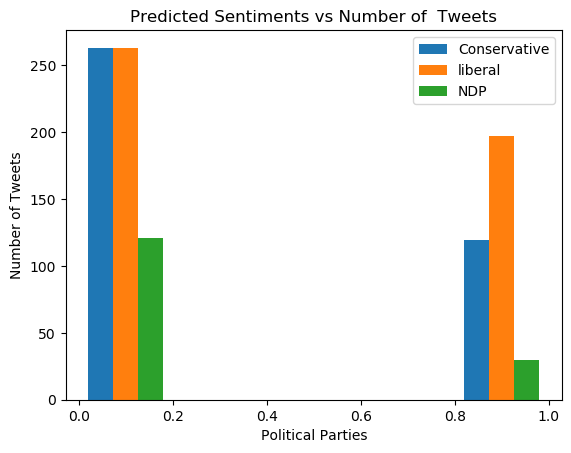

In [124]:
# Plot three parties on same plot
from matplotlib.patches import Rectangle
plt.hist([Conservative_Pred,liberal_Pred,NDP_Pred], bins=5)
plt.title("Predicted Sentiments vs Number of  Tweets")
plt.xlabel("Political Parties")
plt.ylabel("Number of Tweets")
legend = ['Conservative', 'liberal','NDP']
plt.legend(legend)
plt.show()

In [74]:
# Extract the predicted sentiments for each party
Conservative_actual = data_cleaned_election[data_cleaned_election['Party']=='Conservative']['sentiment']
liberal_actual = data_cleaned_election[data_cleaned_election['Party']=='liberal']['sentiment']
NDP_actual = data_cleaned_election[data_cleaned_election['Party']=='ndp']['sentiment']


In [75]:
# Calcualte the number of postive sentiment for each party
Conservative_Positive_actual = Conservative_actual.sum(axis=0)
Liberal_Positive_actual =liberal_actual.sum(axis=0)
NDP_Positive_actual = NDP_actual.sum(axis=0)


In [76]:
# Check the number 
Conservative_Positive_actual,Liberal_Positive_actual,NDP_Positive_actual

(115, 212, 105)

### True Sentiment Plot

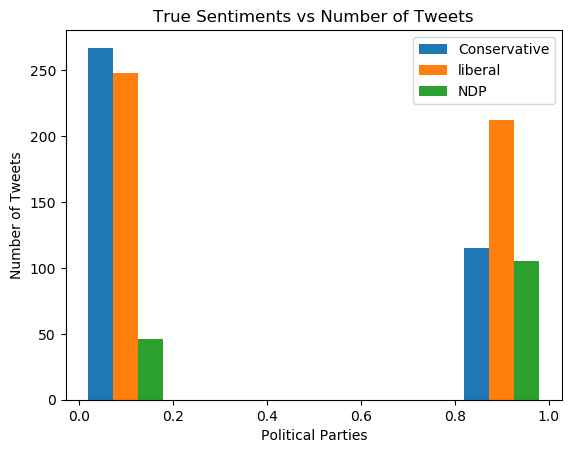

In [77]:
# Plot three parties on same plot - Ture
from matplotlib.patches import Rectangle
plt.hist([Conservative_actual,liberal_actual,NDP_actual], bins=5)
plt.title("True Sentiments vs Number of Tweets")
plt.xlabel("Political Parties")
plt.ylabel("Number of Tweets")
legend = ['Conservative', 'liberal','NDP']
plt.legend(legend)
plt.show()

**Comments:**
As shown from the predicted sentiment plot, more tweets are classified as negative sentiment for all three parties. A similar trend can also be observed in true sentiment plot(negative>positive).Overall, I believe that NPL anlaysis on tweets is, to some extent, useful for political parties, helping to predict the sentiment of election tweets. However, it is worth noting that there is actually a huge difference between the sizes of sentiment and election tweet, which may introduce some errors due to bias. THis is because the features in sentiment tweets are significantly different from the features in election tweets. Thus,training model on "Sentiment tweets" features and appling the model on "election tweets could case this bias.

## Q4 Part 3 - Negative Tweets

**Combine similar reasons**

In [219]:
Election_Negative = data_cleaned_election[data_cleaned_election['sentiment'] ==0]
Election_Negative

,sentiment,negative_reason,text,Party
0,0,Women Reproductive right and Racism,b rosiebarton instead suggestion agree canadia...,Conservative
2,0,Economy,b brantford going cost 94 billion next 4 years...,liberal
4,0,Economy,b canada taxpayers sick tired hard earned dona...,liberal
5,0,Others,b canadavotes2019 elxn43 cdnpoli facts blastfr...,Conservative
8,0,Others,b chooseforward cdnpoli elxn43 ncanada make am...,None
...,...,...,...,...
2125,0,Others,b xe2 x80 x99t supervillain election failed jo...,None
2126,0,Climate Problem,b care limiting climatechange wondering party ...,None
2128,0,Scandal,b know good enough job smearing campaign right...,Conservative
2129,0,Scandal,b missed comment deflecting issue answer best ...,Conservative


In [220]:
Election_Negative['negative_reason'].unique()

array(['Women Reproductive right and Racism', 'Economy', 'Others',
       'Scandal', 'Tell lies', 'Privilege', 'Climate Problem',
       'Healthcare', 'Separation', 'Healthcare and Marijuana'],
      dtype=object)

In [297]:
# Combine similar reasons
Election_Negative['negative_reason'] = Election_Negative['negative_reason'] .replace('Healthcare and Marijuana','Healthcare')
Election_Negative['negative_reason'] = Election_Negative['negative_reason'] .replace('Tell lies','Scandal')
Election_Negative['negative_reason'].unique()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['Women Reproductive right and Racism', 'Economy', 'Others',
       'Scandal', 'Privilege', 'Climate Problem', 'Healthcare',
       'Separation'], dtype=object)

**Comments:** The 'Healthcare and Marijuana' should be treated as a similar type as the "healthcare" reason because they are all talking about the health. Also, the potical scandal is often assoiated with "telling lies". Thus, "tell lies" should be repalced by "Scandal".

### **Label Encoding**

**Encoding the negative reasons - target**

In [125]:
#Encode the sentiments for "2019 Cnadian election" dataset
encoding = LabelEncoder()
encoding.fit(Election_Negative['negative_reason'])
y_election = encoding.transform(Election_Negative['negative_reason'])

**Encoding the tweets using WF**

In [82]:
def WF_processor (df,num):
    vectorizer = CountVectorizer(max_features= num)
    X_sentiment_WF = vectorizer.fit_transform(df).toarray()
    Sentiment_feature_name = vectorizer.get_feature_names()
    X_sentiment_WF_df = pd.DataFrame(X_sentiment_WF, columns=Sentiment_feature_name)
    return X_sentiment_WF_df

In [83]:
X_election_tweet = WF_processor(Election_Negative['text'],100)

In [84]:
X_election_tweet 

,also,andrew,andrewscheer,answer,bernier,campaign,canada,canadian,canadians,cbckatie,...,x9f,xa0,xa4,xa6,xa8,xb8,xc2,xe2,xf0,years
0,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,1,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# Split the data to train and test dataset
X_election_train, X_election_test, y_election_train, y_election_test = train_test_split(X_election_tweet,y_election,test_size=0.3)


In [96]:
# Implement tree models to predict the reason for the negative tweets
def Predict_reason(algorithm,X_election_train,y_election_train,X_election_test,y_election_test):
    classifier = algorithm
    model = classifier.fit(X_election_train,y_election_train)
    y_pred_train = model.predict(X_election_train)
    y_pred_test = model.predict(X_election_test)
    train_score = metrics.accuracy_score(y_election_train, y_election_train)
    test_score = metrics.accuracy_score(y_election_test, y_pred_test)
    return train_score,test_score,y_pred_train,y_pred_test
    

In [99]:
# Ajudstment for logistic regresion to train multi-class targets with one vs rest
logistic_reg = LogisticRegression(solver = 'lbfgs',multi_class='ovr')

In [98]:
#Compute the train and test accuracy score for the three models
#Classifier_list = [Log_model,classifier_rf,classifier_tree ]
train_score_log,test_score_log,y_pred_train,y_pred_test = Predict_reason(logistic_reg,X_election_train,y_election_train,X_election_test,y_election_test)
train_score_rf,test_score_rf,y_pred_train,y_pred_test = Predict_reason(classifier_rf,X_election_train,y_election_train,X_election_test,y_election_test)
train_score_tree,test_score_tree,y_pred_train,y_pred_test = Predict_reason(classifier_tree,X_election_train,y_election_train,X_election_test,y_election_test)


In [94]:
print('Test Accuracy Score Logistic : %0.5f' % test_score_log)
print('Test Accuracy Score Random Forest : %0.5f' % test_score_rf)
print('Test Accuracy Score Decision Tree : %0.5f' % test_score_tree)

Test Accuracy Score Logistic : 0.50331
Test Accuracy Score Random Forest : 0.54305
Test Accuracy Score Decision Tree : 0.51987


In [ ]:
model_rf = classifier_rf.predict(X_election_tweet,)
y_pred_rf = model.predict(X_election_train)


**Comments:** As shown, the random forest classifier performs better in classifying and predicting the negaive reasons.

In [271]:
# Lets check the number of tweets for each type of reasons
pd.DataFrame(y_pred_test)[0].unique()

array([3, 5, 7, 1, 0])

# Part 5: Results

#### Explain how each party is viewed in the public eye based on the sentiment value.

For Conservative party, there are more negative sentimens than the postive. Similar to conservative party, the number negative tweets are greater than the positive tweets. However, there are relatively more positive tweets than the negative for NDP. In addition, all liberal party seems to have more positive sentiment than other two parties.

#### For the second model, based on the model that worked best, provide a few reasons why your model may fail to predict the correct negative reasons.Back up your reasoning with examples from the test sets.

In [299]:
# Lets check the number of tweets for each type of reason - no encoding
Election_Negative['negative_reason'].value_counts()

Scandal                                468
Others                                 364
Economy                                 51
Women Reproductive right and Racism     45
Climate Problem                         41
Separation                              16
Privilege                               12
Healthcare                               9
Name: negative_reason, dtype: int64

In [300]:
## Lets check the number of tweets for each type of reason for encoding
pd.DataFrame(y_election)[0].value_counts()

5    468
3    364
1     51
7     45
0     41
6     16
4     12
2      9
Name: 0, dtype: int64

The associated encoding for each category are:
Scandal(5),Others(3),Economy(1),Women Reproductive right and Racism(7), Climate Problem(0),Separation(6),Privilege(4),Healthcare(2)

In [301]:
# Lets check the predicted number of tweets for each reason
pd.DataFrame(y_pred_test)[0].value_counts()

3    166
5    116
1     10
0      6
7      4
Name: 0, dtype: int64

It is noted that our pridection did not include class 2,4 and 6 and most of tweets are classifed as the class "Others". It is possible that the model did not detect othese classes and lets look an example. 

In [320]:
# Example from dataset of index = 53
Election_Negative[Election_Negative['negative_reason'] == 'Healthcare']['text']
Election_Negative.loc[53].tolist()

[0,
 'Healthcare',
 'b cbconthecoast coalition gov might get us evidence based policy opioid crisis killed 13 000 canadians since 2016 must stop harm stop inter generational trauma elxn43 cdnpoli stoptheharm safesupply decriminalize voteforchange',
 'None']

Fisrt, it is noted that there are many rare words in the dataset (e.g., opioid) and the dataset encoding is used WF  (with top 100 most common words), which may make the tweets like this to be miss classified. Thus, tfidf could be used to solve this problem as it also considers the rareness of words.

**For both models, suggest one way you can improve the accuracy of your models.**

There are several ways to improve the accuracy. First, we can increase feature space dimentison of "Election" tweet to match the feature dimension of "Sentiment" tweet. This is because we have a huge dataset for "sentiment" tweet while a much smaller dataset for "election" tweet. Such a differnce could introduce a bias. Thus, Secondly, the label ecoder conver the negative text's target from text to number 0 to 7, which could misinterpret the targets by having some sort of order in them. This ording issue could be sovled by One-Hot Encoding.